In [2]:
import numpy as np
import astropy as ast
import scipy as sc
import matplotlib.pyplot as plt

import numpy as np
import math
import astropy
import numpy.linalg

In [3]:
dir = '/data/vxtest/514d'
#dir = '../518'
ifile = 1330
filename =  dir+'/snapshot_1330'
haloname = dir+'/h1330.z0.000.AHF_halos'

In [4]:
dh = np.loadtxt(haloname)
xh = dh[:,5]
yh = dh[:,6]
zh = dh[:,7]
vxh = dh[:,8]
vyh = dh[:,9]
vzh = dh[:,10]

print(xh[0],yh[0],zh[0],vxh[0],vyh[0],vzh[0])

hd = np.fromfile(filename,dtype='int32',count=7)
nd = hd[2]
ns = hd[5]
nc = hd[3]
head = np.fromfile(filename,dtype='double',count=7,offset=4+6*4)
time=head[6]
print(time,nd,ns,nc)

start_d = 0
start_c = nd
start_s = nd + nc
block = nd + nc + ns

skipx = 256 + 3*4 + start_c*3*8
skipv = 256 + 5*4 + (block*3 + start_c*3)*8
skipi = 256 + 7*4 + block*3*2*8 + start_c*4
rc = np.fromfile(filename,dtype='double',count=3*nc,offset=skipx)
vc = np.fromfile(filename,dtype='double',count=3*nc,offset=skipv)

idc = np.fromfile(filename,dtype='uint32',count=nc,offset=skipi)
jxc = rc[0::3] - xh[0]
jyc = rc[1::3] - yh[0]
jzc = rc[2::3] - zh[0]

jvxc = vc[0::3] - vxh[0]
jvyc = vc[1::3] - vyh[0]
jvzc = vc[2::3] - vzh[0]

idc -= nd
ki = np.zeros(nc,dtype='int32')

for j in range(nc):
    ix = idc[j]
    ki[ix] = j

xc = jxc[ki]
yc = jyc[ki]
zc = jzc[ki]

vxc = jvxc[ki]
vyc = jvyc[ki]
vzc = jvzc[ki]

skipx = 256 + 3*4 + start_s*3*8
skipv = 256 + 5*4 + block*3*8 + start_s*3*8 #skip over r, and dm+c v's
skipi = 256 + 7*4 + block*3*2*8 + start_s*4 #skip over r and v and dm+c id
skipc = 256 + 9*4 + block*(2*3*8+4) + start_s*4 #skip over r, v and id and dm+c ic

rs = np.fromfile(filename,dtype='double',count=3*ns,offset=skipx)
vs = np.fromfile(filename,dtype='double',count=3*ns,offset=skipv)
ics = np.fromfile(filename,dtype='uint32',count=ns,offset=skipc)

xs = rs[0::3] - xh[0]
ys = rs[1::3] - yh[0]
zs = rs[2::3] - zh[0]
vxs = vs[0::3] - vxh[0]
vys = vs[1::3] - vyh[0]
vzs = vs[2::3] - vzh[0]

-135.83711305 342.85332493 569.47096079 -17.22 33.04 43.31
14.099999996515194 70514272 10454433 64


In [4]:
cluster = 37
select=ics==cluster
print(xs[select])
print(xc[cluster],yc[cluster],zc[cluster])

[-48.10163267 -42.36662769 -44.67480587 ...  24.66195171  24.66274439
  24.66289893]
24.650177228499146 12.842420562883603 10.115084620141602


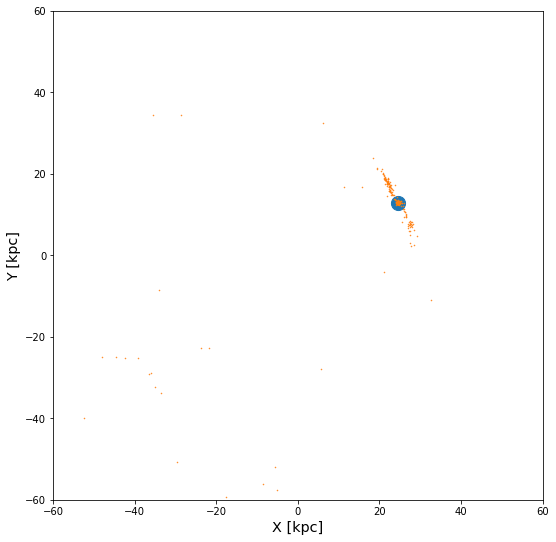

In [5]:
plt.rcParams["figure.figsize"] = (9,9)
fig, (ax1) = plt.subplots()
ax1.set_aspect(aspect=1)
rplot = 60
ax1.axis([-rplot,rplot,-rplot,rplot])
ax1.set_xlabel('X [kpc]',size='x-large')
ax1.set_ylabel('Y [kpc]',size='x-large')

ax1.scatter(xc[cluster],yc[cluster],marker='o',s=200) #,color=i)
#for i in range(len(xc)):

ax1.scatter(xs[select],ys[select],marker='.',s=1) #,color=i)


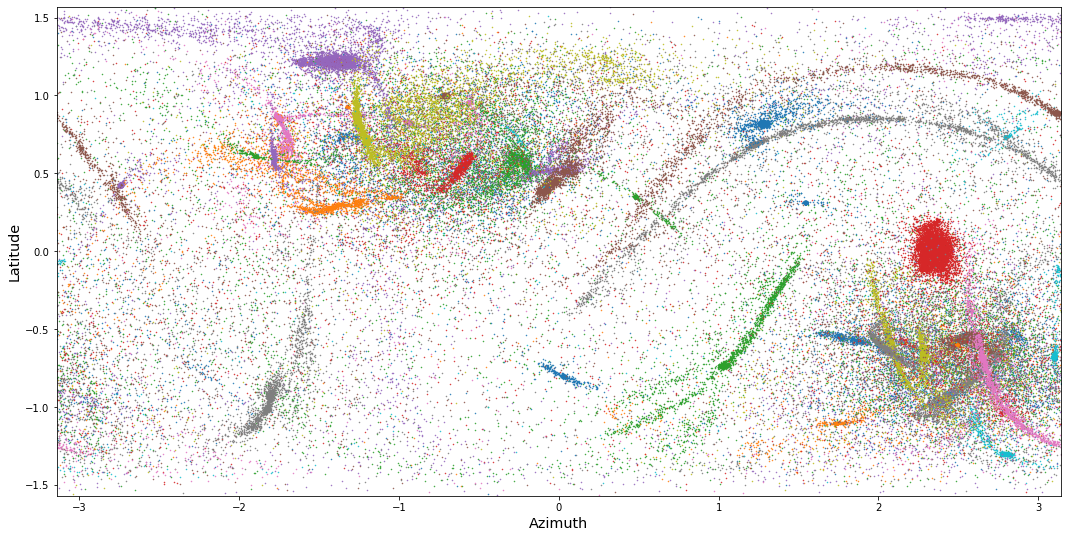

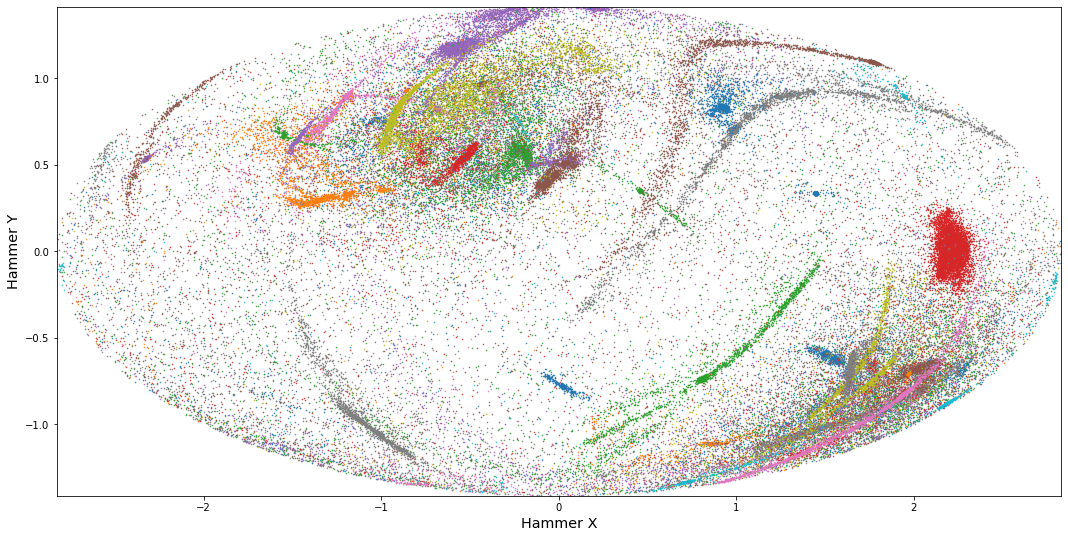

In [6]:
plt.rcParams["figure.figsize"] = (18,9)
fig, (ax1) = plt.subplots()
#ax1.set_aspect(aspect=1)
ax1.axis([-math.pi,math.pi,-math.pi/2,math.pi/2])
ax1.set_xlabel('Azimuth',size='x-large')
ax1.set_ylabel('Latitude',size='x-large')

rs = np.sqrt(xs*xs +ys*ys + zs*zs)
dc = np.sqrt(xc*xc +yc*yc + zc*zc)
lon = np.arctan2(ys,xs)
lat = np.arcsin(zs/rs)
#coslon = lon*np.cos(lat)

for i in range(len(xc)):
    dplot1 = dc[i] > 10
    dplot2 = dc[i] < 100
    if dplot1 & dplot2:
        cplot1 = ics == i
        cplot = cplot1 
        ax1.scatter(lon[cplot],lat[cplot],marker='.',s=1) #,color=i)

#Hammer (equal area) projection
hd = np.sqrt(1.+np.cos(lat)*np.cos(lon/2))
hx = 2.*math.sqrt(2)*np.cos(lat)*np.sin(lon/2)/hd
hy = math.sqrt(2)*np.sin(lat)/hd
plt.rcParams["figure.figsize"] = (18,9)
fig, (ax1) = plt.subplots()
#ax1.set_aspect(aspect=1)
ax1.axis([-2.*math.sqrt(2),2.*math.sqrt(2),-math.sqrt(2),math.sqrt(2)])
ax1.set_xlabel('Hammer X',size='x-large')
ax1.set_ylabel('Hammer Y',size='x-large')

for i in range(len(xc)):
    dplot1 = dc[i] > 10
    dplot2 = dc[i] < 100
    if dplot1 & dplot2:
        cplot1 = ics == i
        cplot = cplot1 
        ax1.scatter(hx[cplot],hy[cplot],marker='.',s=1) #,color=i)


In [7]:
dg = math.sqrt(2)/90 #grid cell 1 sq deg in hammer units
dg /= 4 #make grid 0.5 deg
xmax = 2*math.sqrt(2)
ymax =   math.sqrt(2)
ngx = int(2*xmax/dg +1)
ngy = int(2*ymax/dg +1)
x = np.linspace(-xmax, xmax, ngx+1)
y = np.linspace(-ymax, ymax, ngy+1)
xv, yv = np.meshgrid(x, y)

D = np.zeros((ngy+1,ngx+1))
for i in range(len(hx)):
    c1= rs[i]>15
    c2= rs[i]<50
    c=c1&c2
    if c : 
        ix = int(round((hx[i]+xmax)/dg))
        iy = int(round((hy[i]+ymax)/dg))
        D[iy  ,ix  ] += 1.0
        


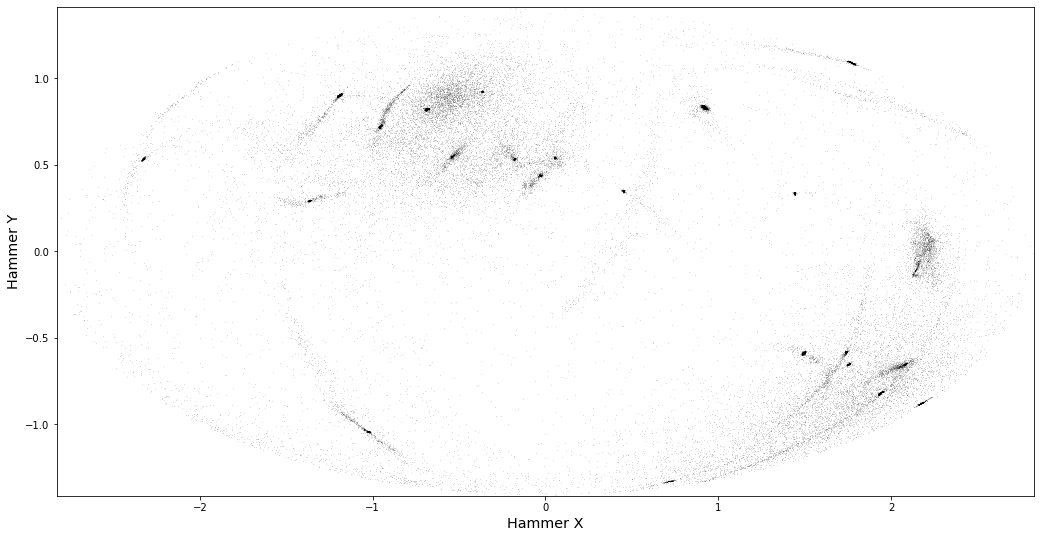

In [8]:
Ds = np.sqrt(D) #scaling for plot

plt.rcParams["figure.figsize"] = (18,9)
fig, (ax1) = plt.subplots()

ax1.set_aspect(aspect=1)
ax1.set_xlabel('Hammer X',size='x-large')
ax1.set_ylabel('Hammer Y',size='x-large')

cmap = plt.get_cmap('binary')
cr=ax1.pcolormesh(xv,yv,Ds,cmap=cmap,vmin=0.5,vmax=4)

In [9]:
#rotating streams to be along the equator
#rc is the array in the read order, xc,yc,zc are the correct order
r=[]
v=[]
for i in range(nc):
    r = np.append(r, np.array([xc[i],yc[i],zc[i]]))
    v = np.append(v, np.array([vxc[i],vyc[i],vzc[i]]))
r=r.reshape(int(len(r)/3), 3)
v=v.reshape(int(len(v)/3), 3)

Lc=np.cross(r,v)

unit_z=[]
unit_x=[]

for i in range(nc):
    unit_z = np.append(unit_z, Lc[i]/numpy.linalg.norm(Lc[i]))
    unit_x = np.append(unit_x, r[i]/numpy.linalg.norm(r[i]))
unit_z=unit_z.reshape(int(len(unit_z)/3), 3)
unit_x=unit_x.reshape(int(len(unit_x)/3), 3)

unit_y=np.cross(unit_z, unit_x)

xc_new=np.zeros(nc)
yc_new=np.zeros(nc)
zc_new=np.zeros(nc)
for i in range(nc):
    xc_new[i]=np.dot(unit_x[i], r[i])
    yc_new[i]=np.dot(unit_y[i], r[i])
    zc_new[i]=np.dot(unit_z[i], r[i])


In [10]:
rad_s=np.zeros(3*ns)
xs_new=np.zeros(ns)
ys_new=np.zeros(ns)
zs_new=np.zeros(ns)
#select=ics==cluster
for i in range(len(xs)):
    rad_s[i*3]=xs[i]
    rad_s[i*3+1]=ys[i]
    rad_s[i*3+2]=zs[i]
r_s=rad_s.reshape(ns,3)

In [11]:
for i in range(ns):
    xs_new[i]=np.dot(unit_x[ics[i]], r_s[i])
    ys_new[i]=np.dot(unit_y[ics[i]], r_s[i])
    zs_new[i]=np.dot(unit_z[ics[i]], r_s[i])
    #xs_new=np.append(xs_new, np.dot(unit_x[1], r_s[1]))
    #ys_new=np.append(ys_new, np.dot(unit_y[1], r_s[1]))
    #zs_new=np.append(zs_new, np.dot(unit_z[1], r_s[1]))
#        print(xs[i],ys[i],zs[i],r_s[i])

/tmp/ipykernel_45728/2718356719.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1,ax2) = plt.subplots(ncols=2)


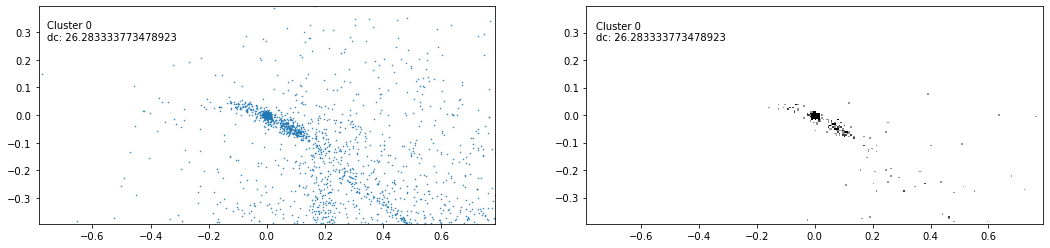

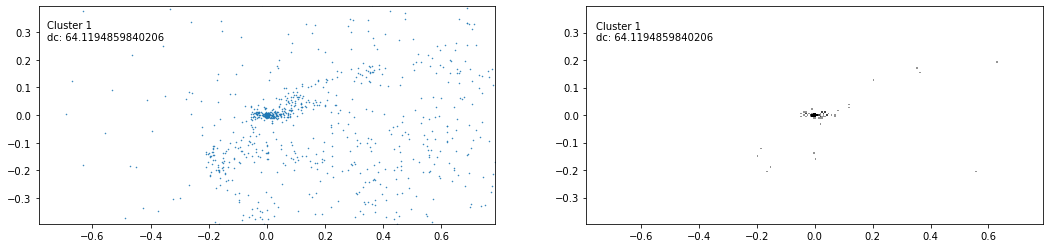

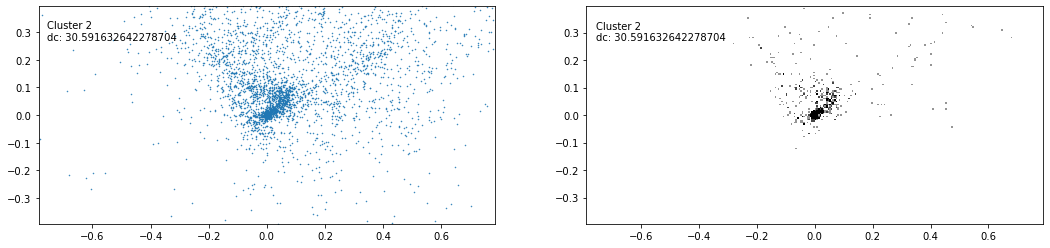

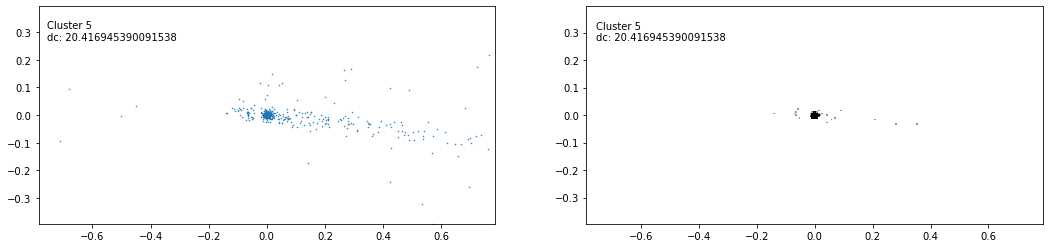

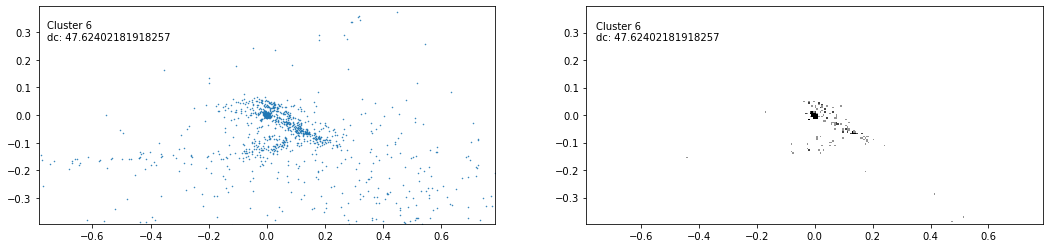

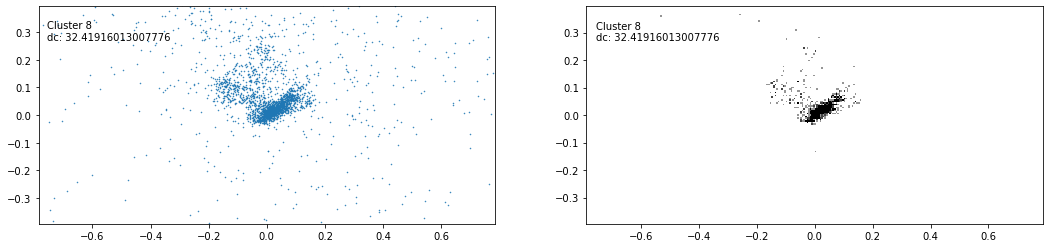

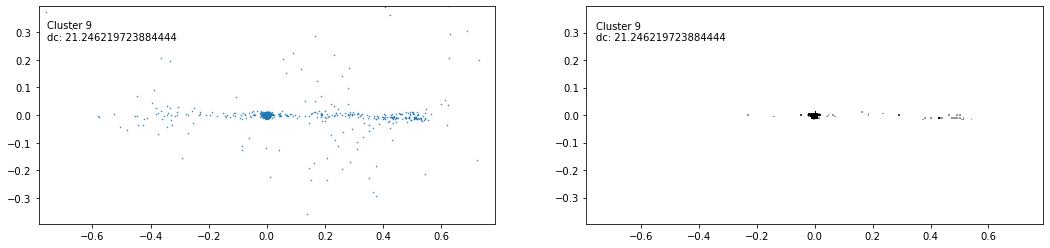

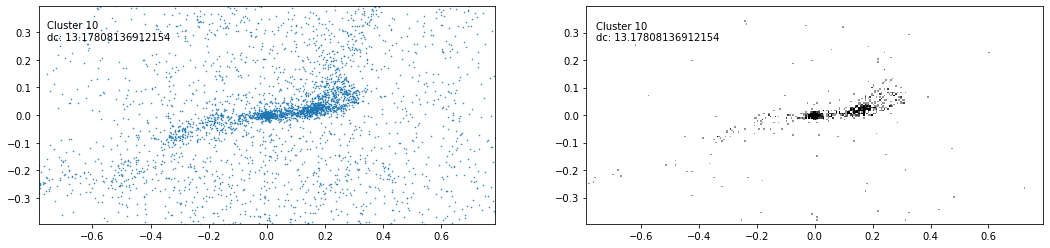

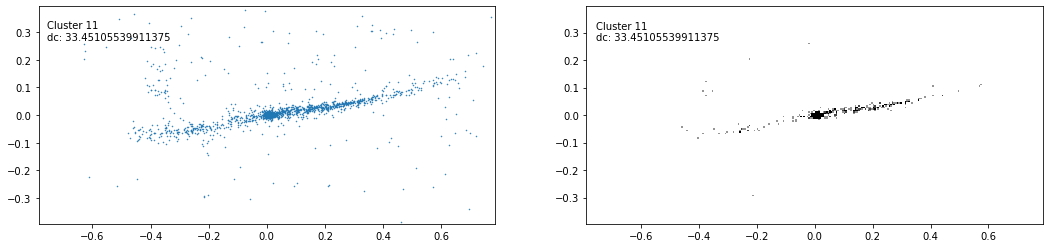

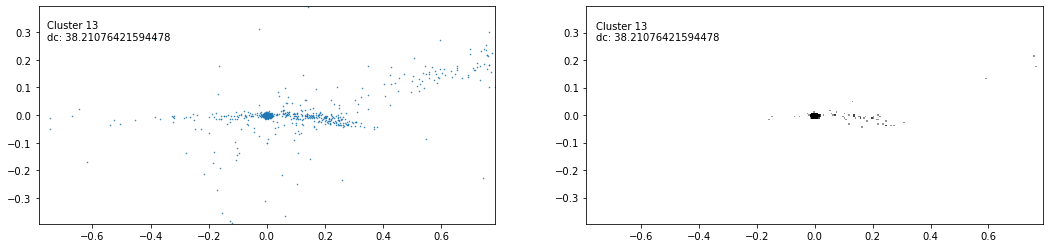

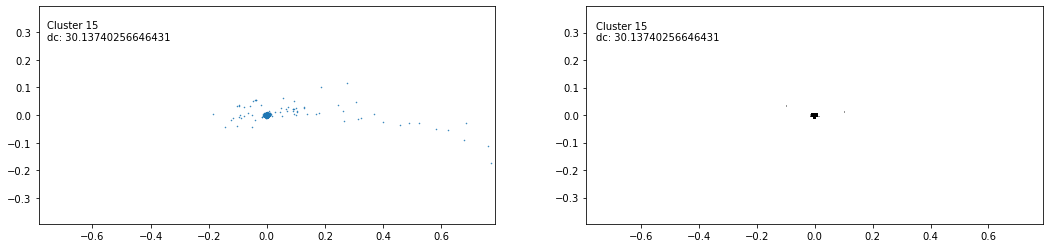

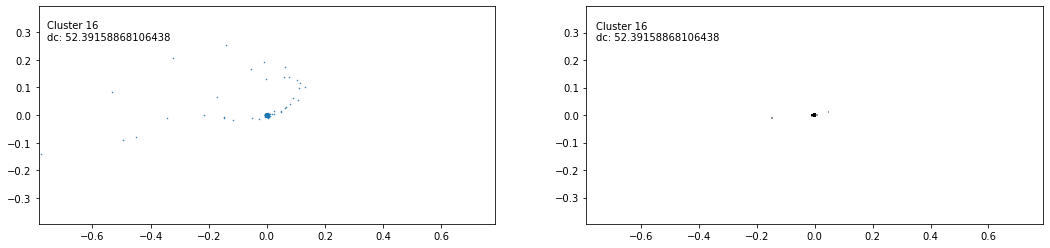

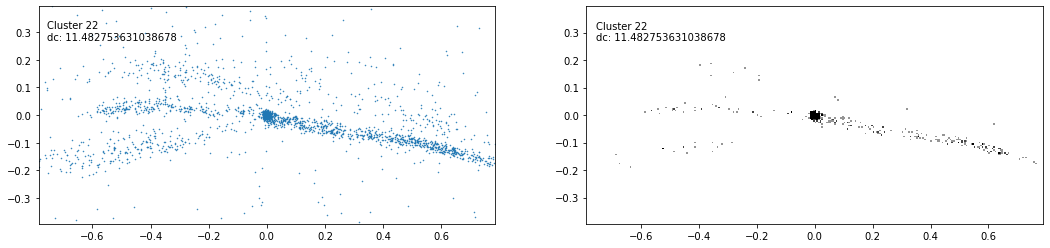

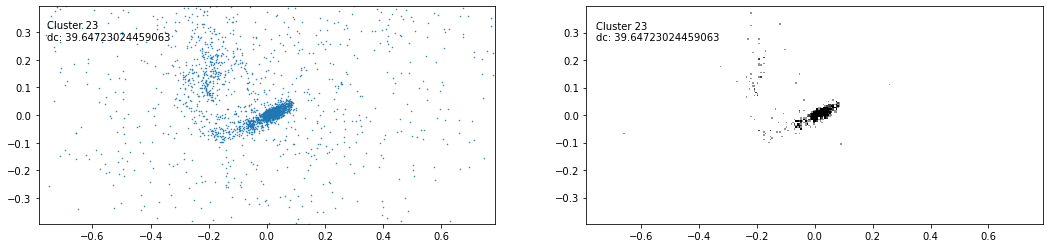

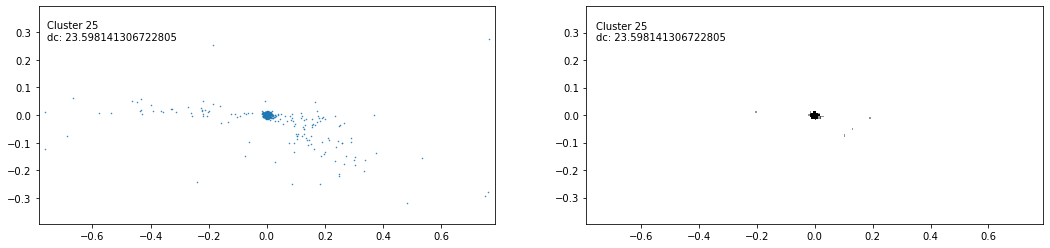

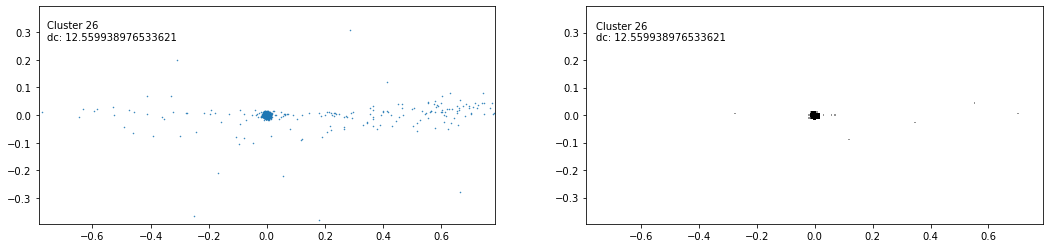

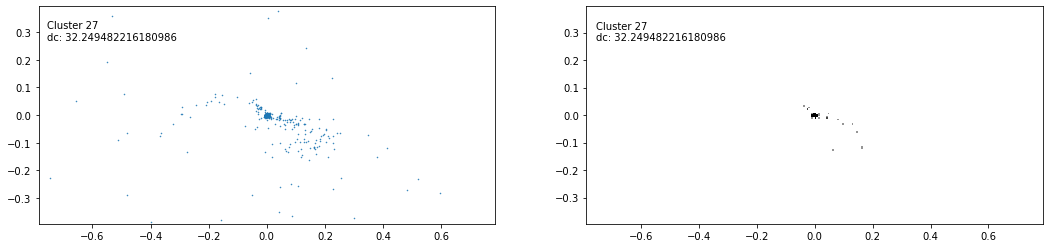

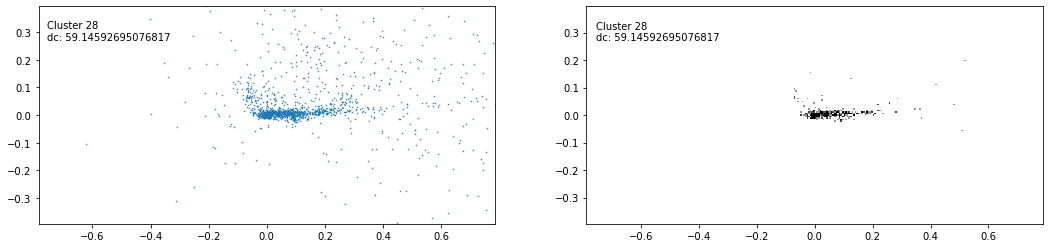

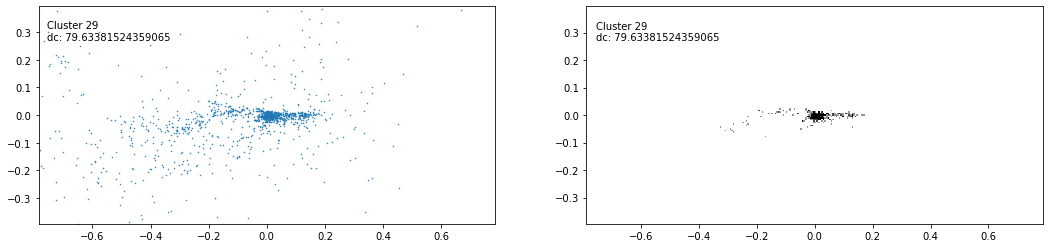

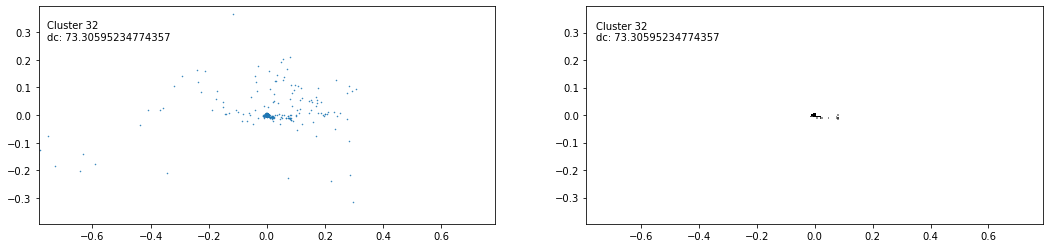

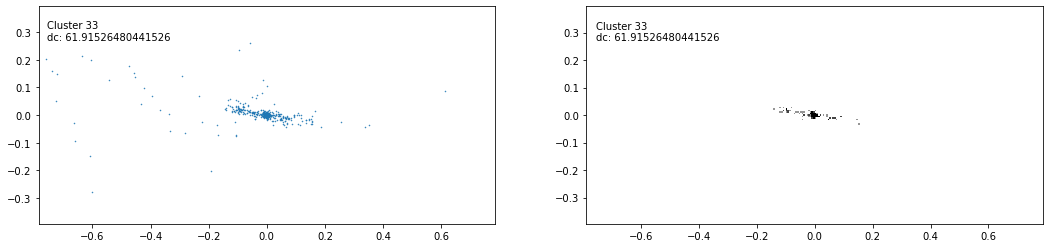

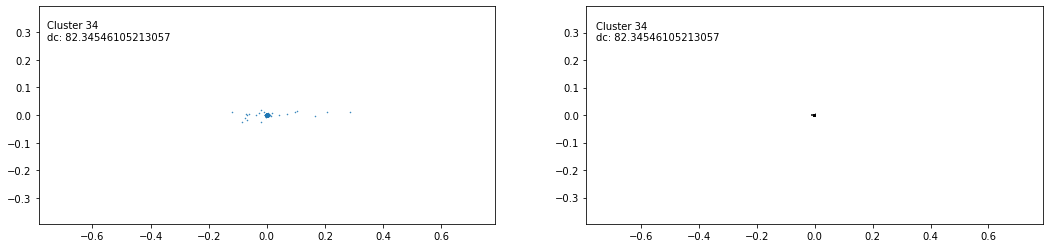

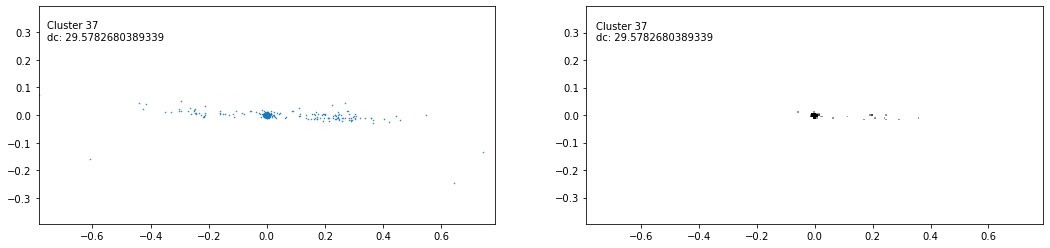

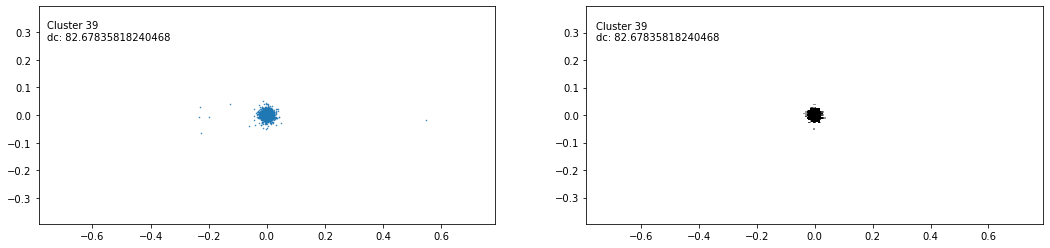

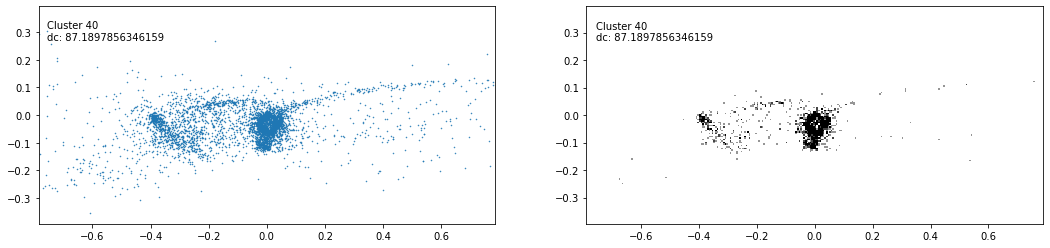

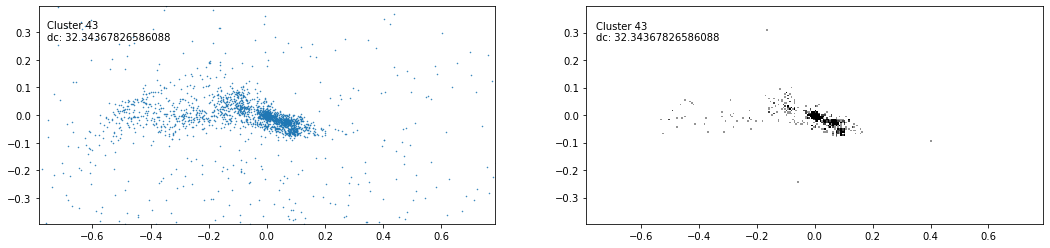

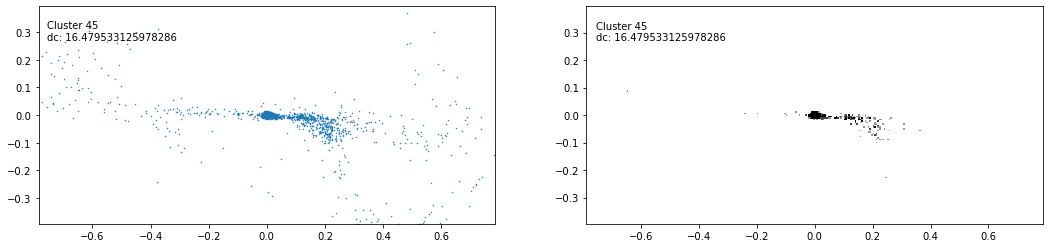

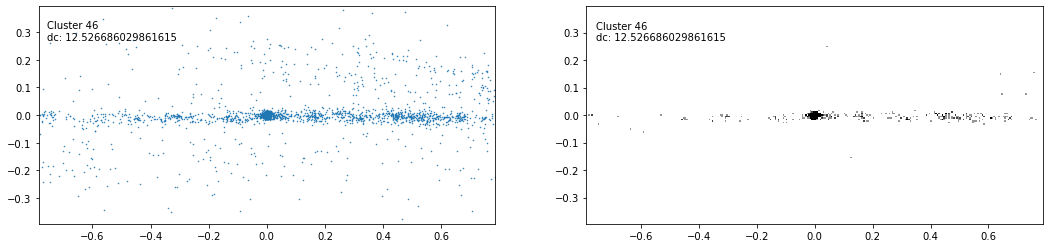

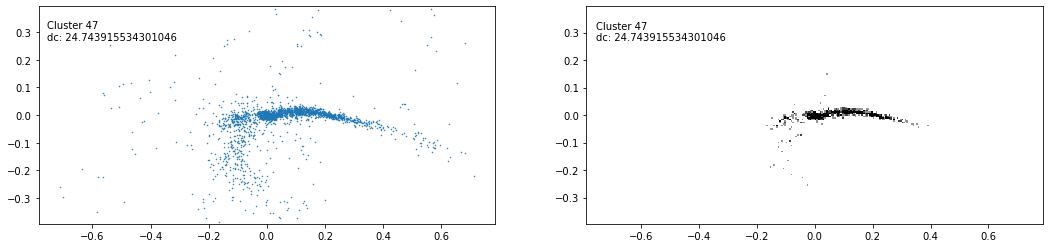

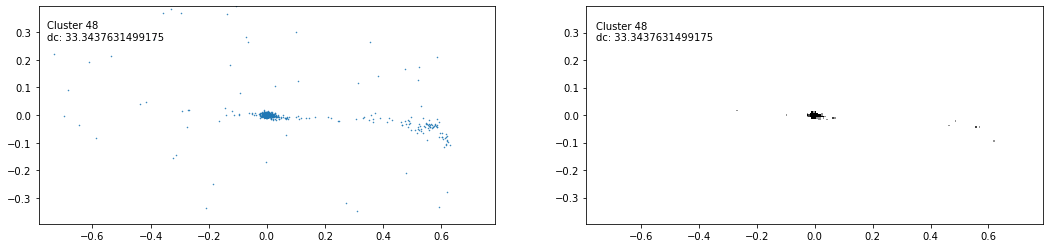

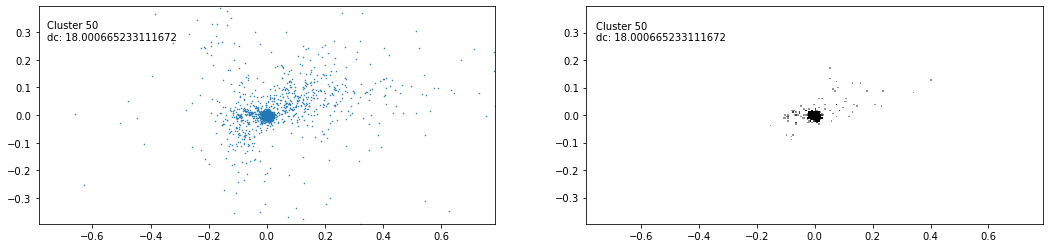

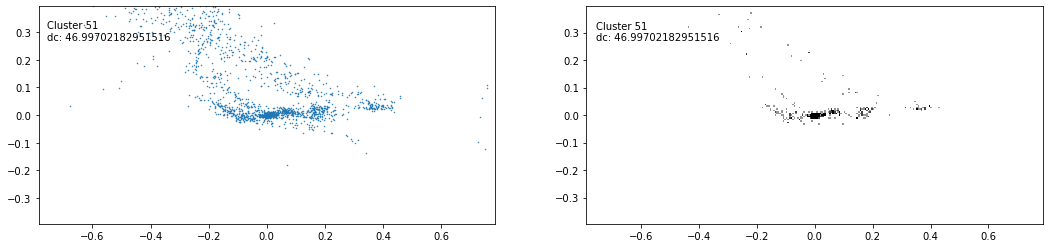

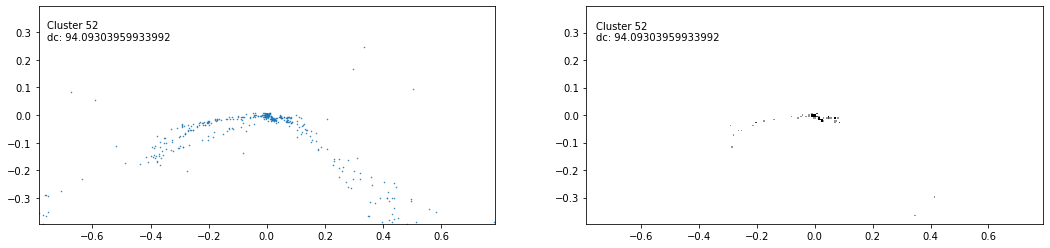

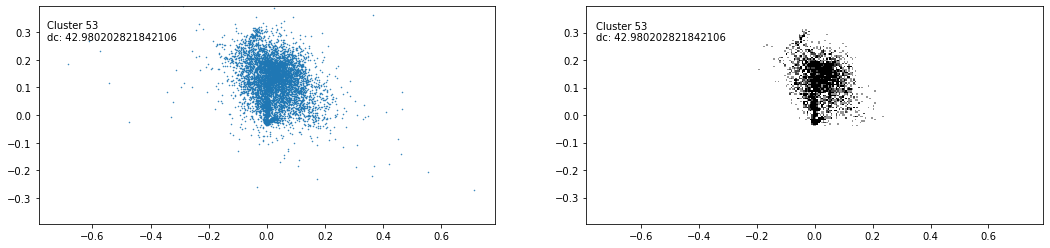

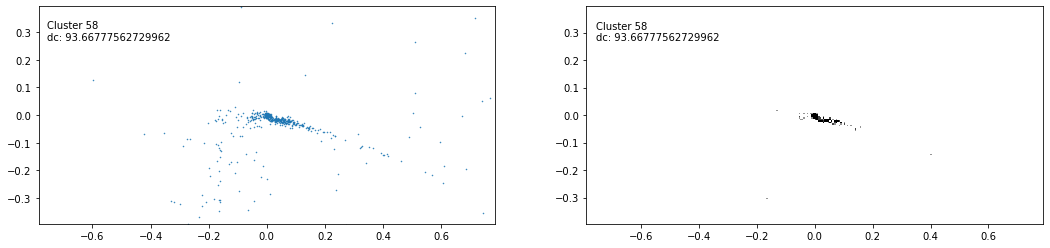

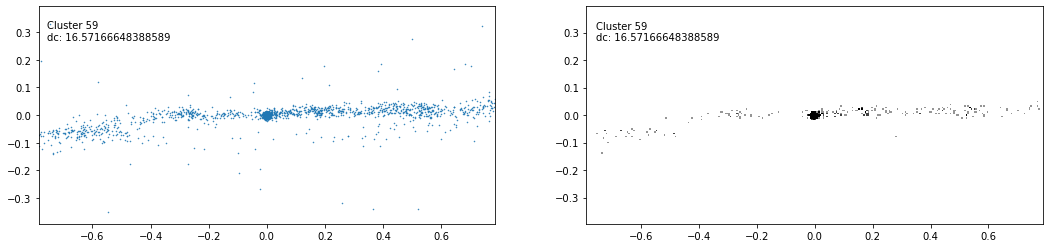

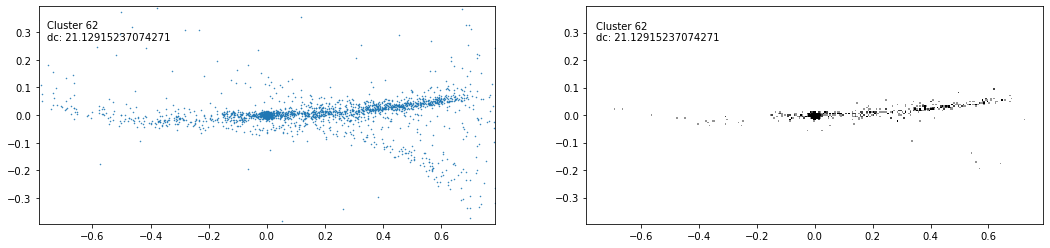

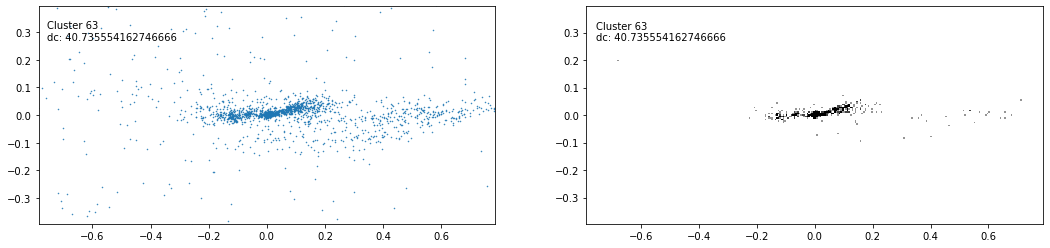

In [12]:
rs_new = np.sqrt(xs_new*xs_new +ys_new*ys_new + zs_new*zs_new)
dc_new = np.sqrt(xc_new*xc_new +yc_new*yc_new + zc_new*zc_new)
lon_new = np.arctan2(ys_new,xs_new)
lat_new = np.arcsin(zs_new/rs_new)

dg = 0.5/90
lon_new_single=[]
lat_new_single=[]

for i in range(nc):
    dplot1 = dc_new[i] > 10
    dplot2 = dc_new[i] < 100
    if dplot1 & dplot2:
        plt.rcParams["figure.figsize"] = (18,4)
        fig, (ax1,ax2) = plt.subplots(ncols=2)
#ax1.set_aspect(aspect=1)
        zoom=4
        ax1.axis([-math.pi/zoom,math.pi/zoom,-math.pi/2/zoom,math.pi/2/zoom])
        lonmax=math.pi/zoom
        latmax=math.pi/2/zoom
        nglon = int(2*lonmax/dg +1) 
        nglat = int(2*latmax/dg +1)
        lon = np.linspace(-lonmax, lonmax, nglon+1) 
        lat = np.linspace(-latmax, latmax, nglat+1) 
        lonv, latv = np.meshgrid(lon, lat)
        D = np.zeros((nglat+1,nglon+1)) 
#ax1.set_xlabel('Azimuth',size='x-large')
#ax1.set_ylabel('Latitude',size='x-large')
#coslon = lon*np.cos(lat)
#c1=dc_new>10
#c2=dc_new<100
        c3=ics==i
        c4=c3
        lon_new_single=lon_new[c4]
        lat_new_single=lat_new[c4]
        for k in range(len(lon_new_single)):
            # c1= rs[i]>15
            #c2= rs[i]<50
            #c=c1&c2 
            req1=lon_new_single[k]<=lonmax
            req2=lat_new_single[k]<=latmax
            req3=lon_new_single[k]>=-1*lonmax
            req4=lat_new_single[k]>=-1*latmax
            req5=req1&req2&req3&req4
            if req5: #c : 
                ix = int(round((lon_new_single[k]+lonmax)/dg)) 
                iy = int(round((lat_new_single[k]+latmax)/dg)) 
                D[iy ,ix ] += 1.0
        #Ds=D
        Ds = np.sqrt(D) 
        #scaling for plot
        cmap = plt.get_cmap('binary') 
        D = np.zeros((nglat+1,nglon+1))
        ax1.scatter(lon_new[c4], lat_new[c4], marker='.', s=1)
        ax1.text(-1*lonmax+0.03, latmax-0.05, 'Cluster '+str(i)+'\ndc: '+str(dc_new[i]), ha='left', va='top')
        ax2.pcolormesh(lonv,latv,Ds,cmap=cmap,vmin=1.0,vmax=2)
        ax2.text(-1*lonmax+0.03, latmax-0.05, 'Cluster '+str(i)+'\ndc: '+str(dc_new[i]), ha='left', va='top')

/tmp/ipykernel_13472/2549170957.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1,ax2) = plt.subplots(ncols=2)


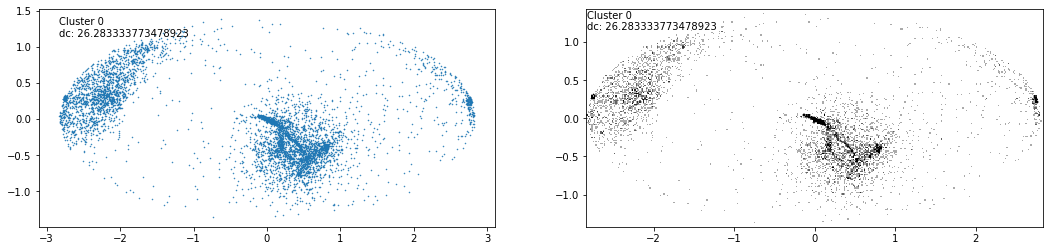

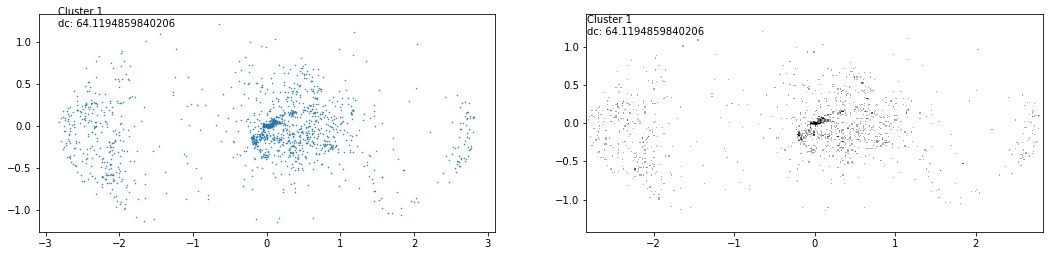

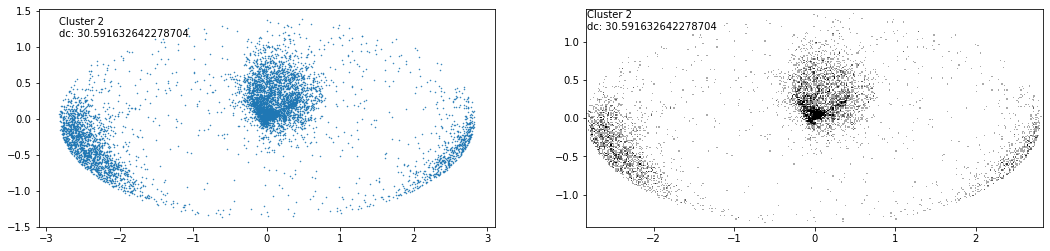

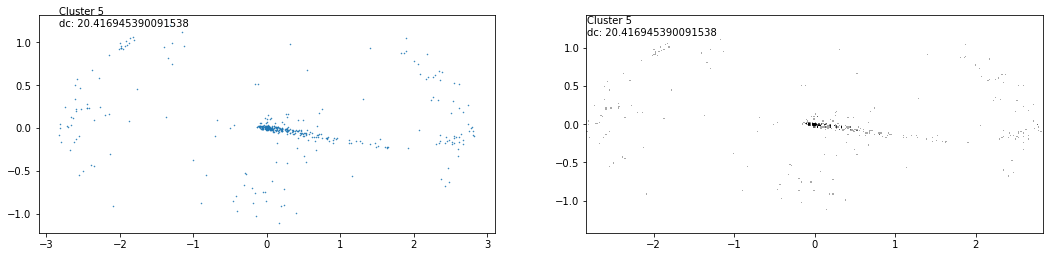

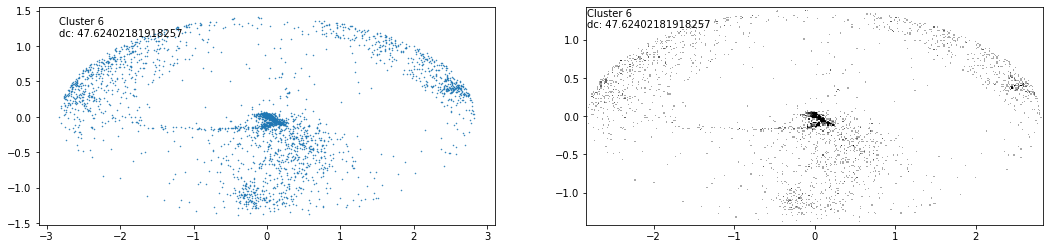

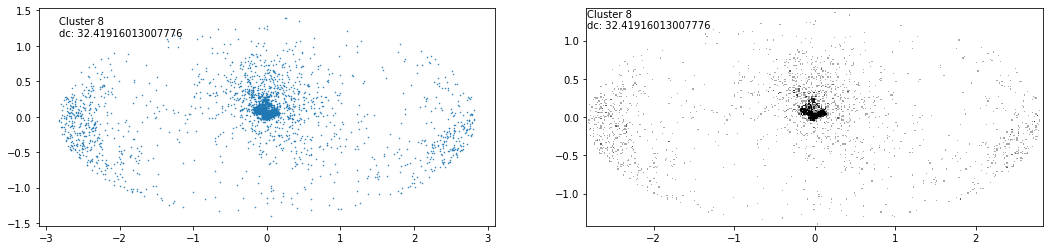

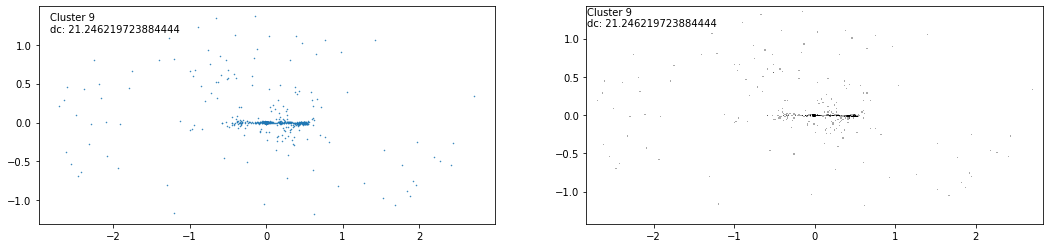

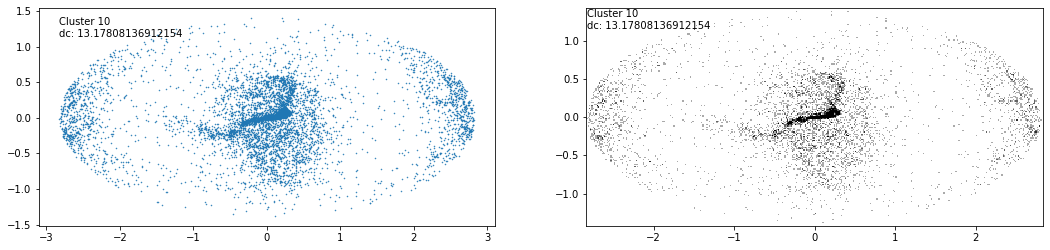

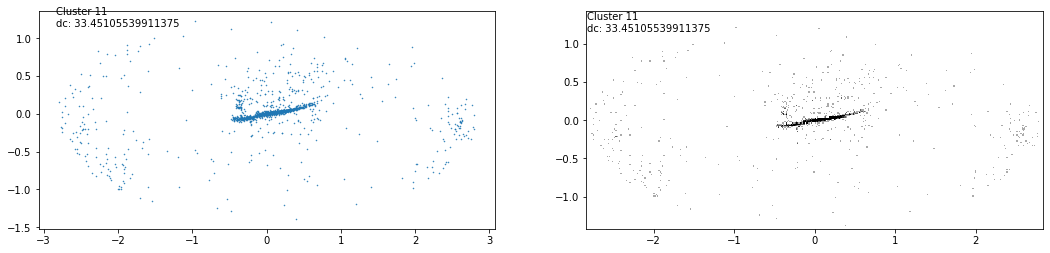

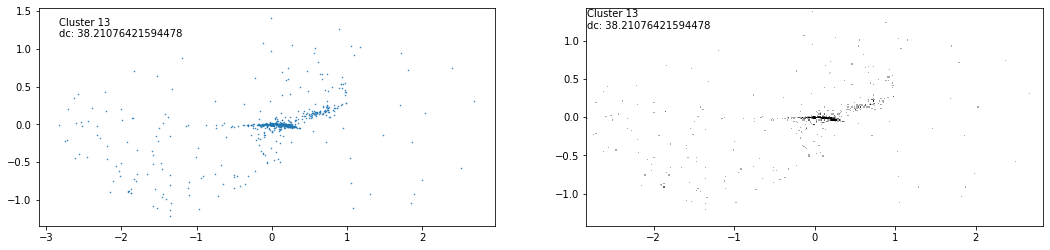

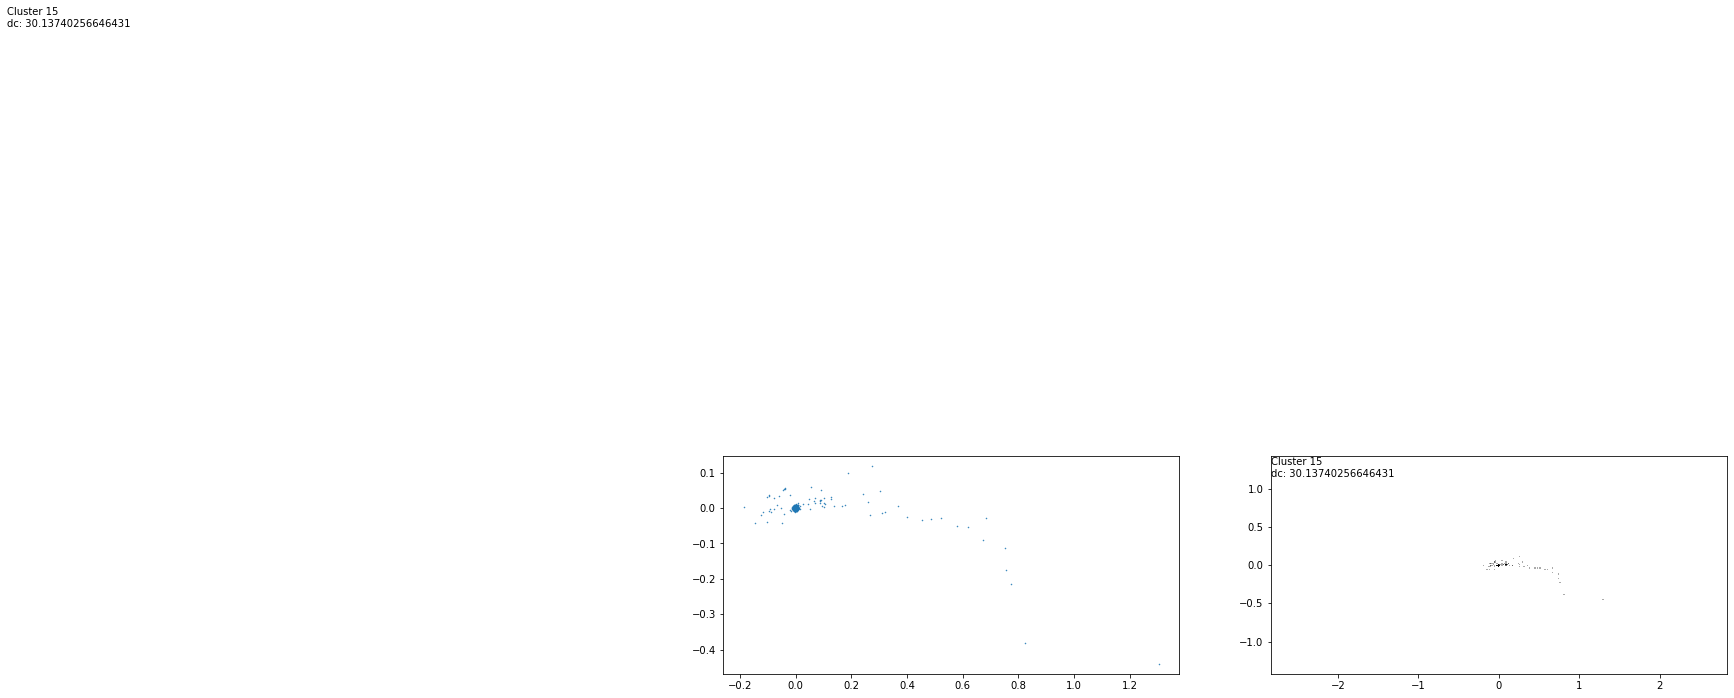

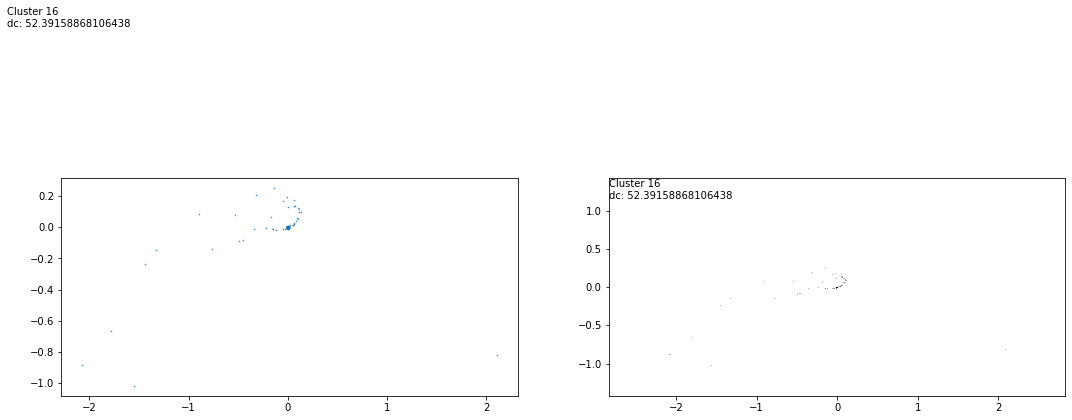

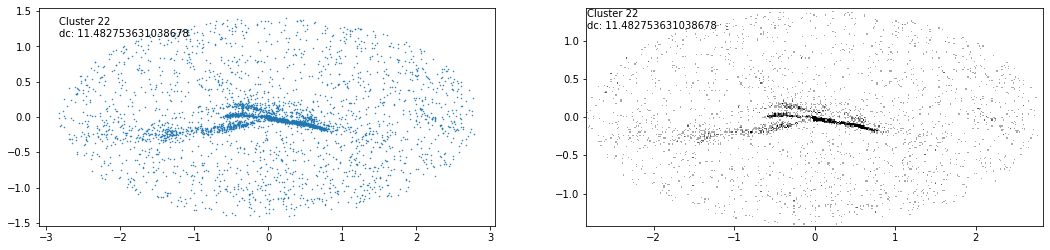

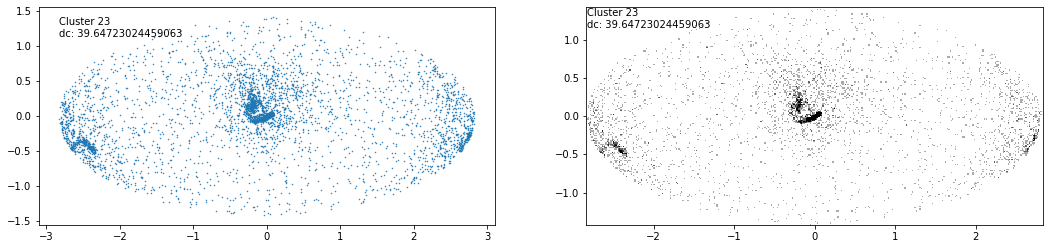

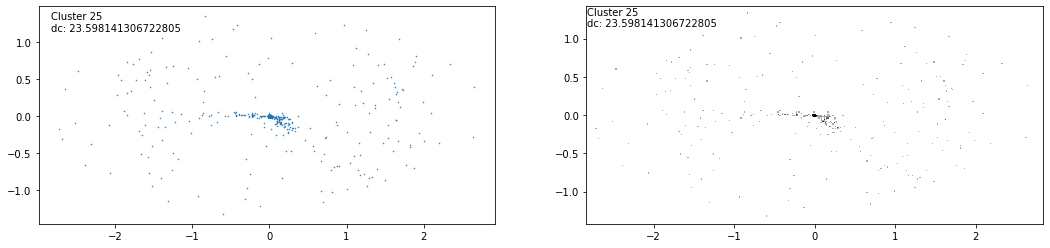

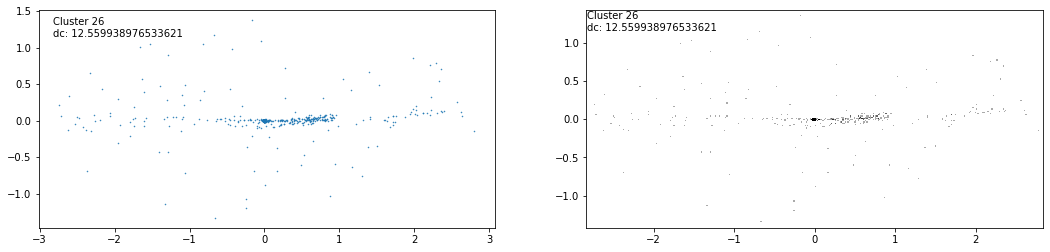

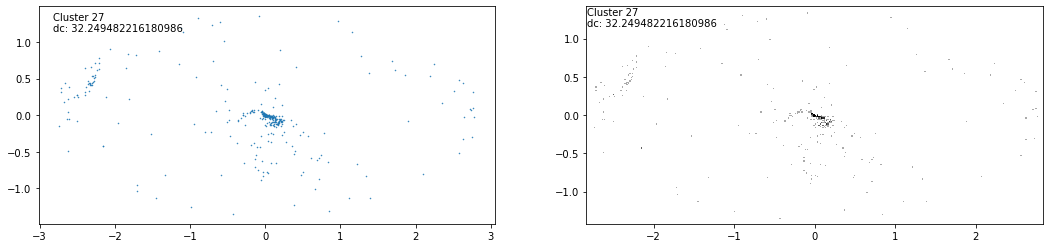

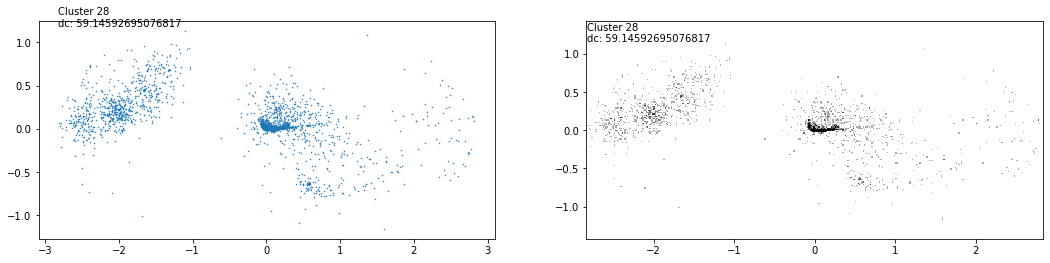

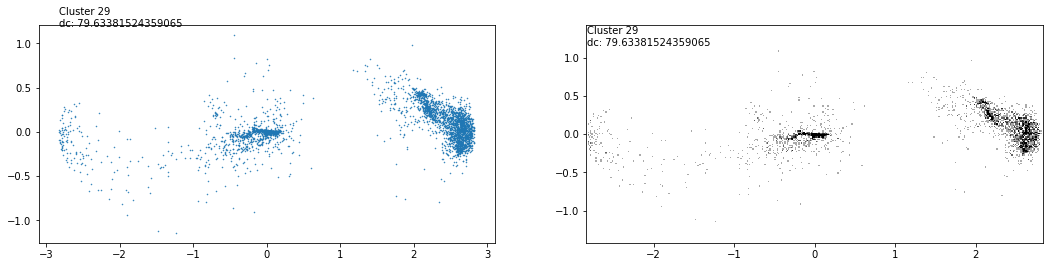

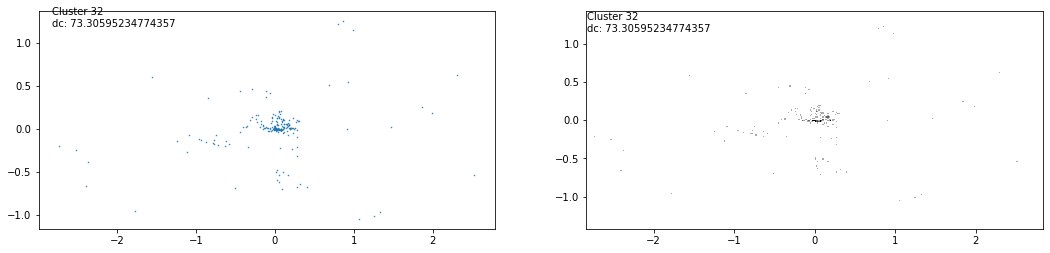

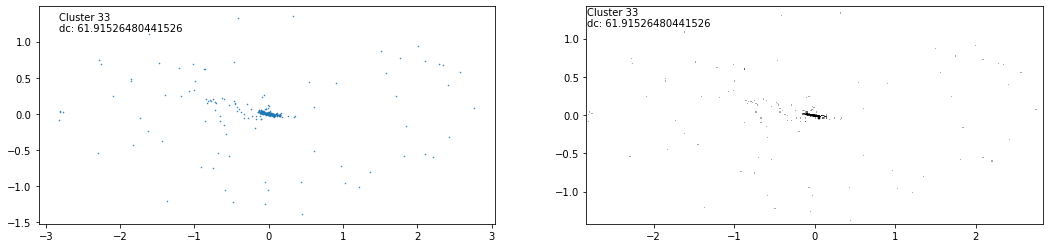

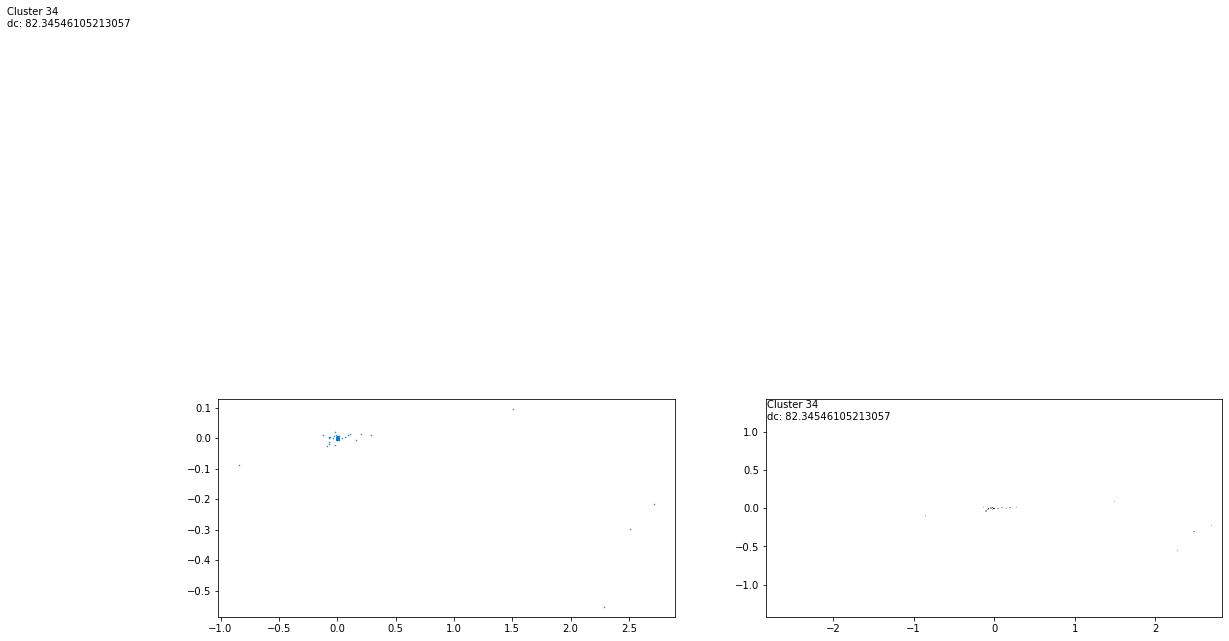

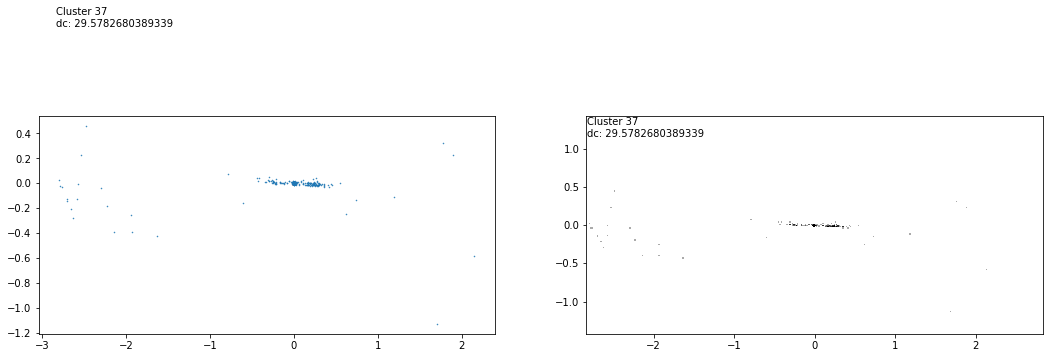

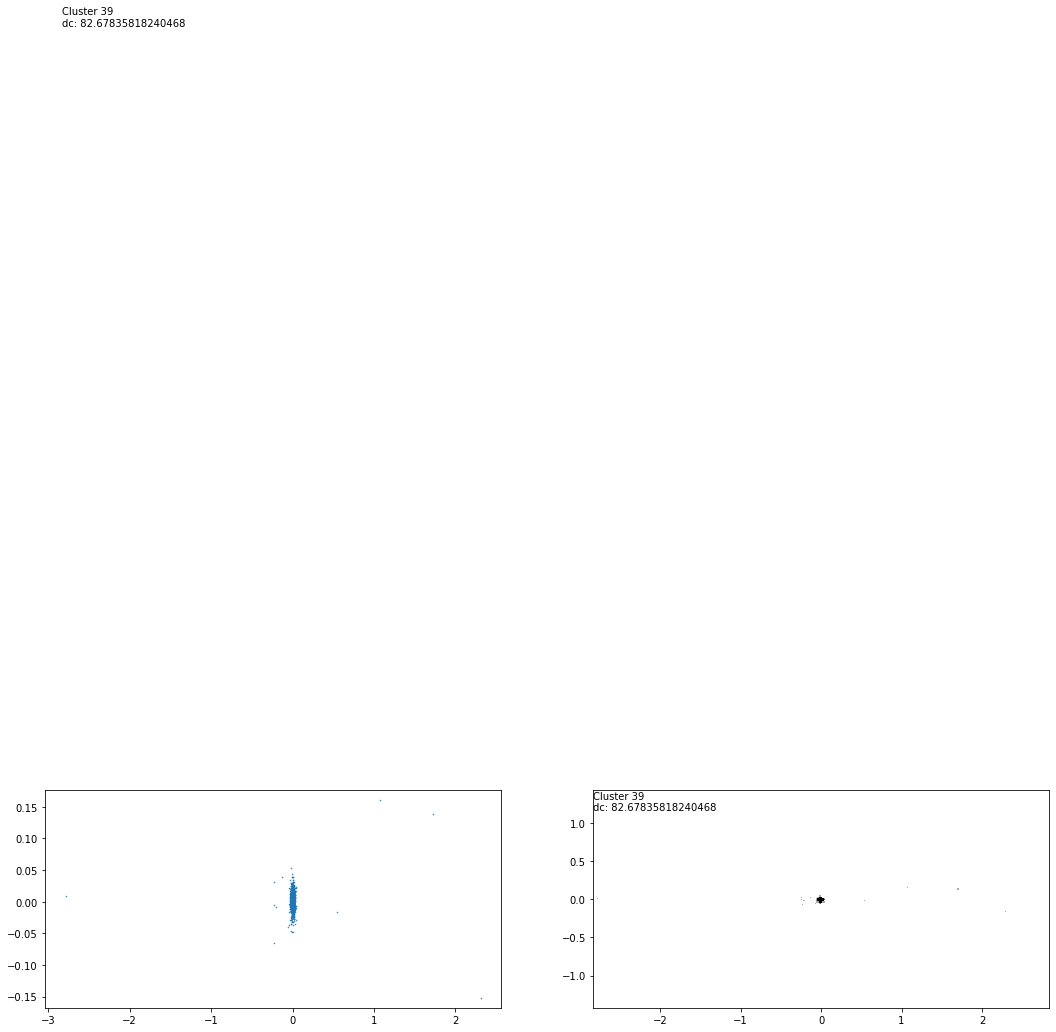

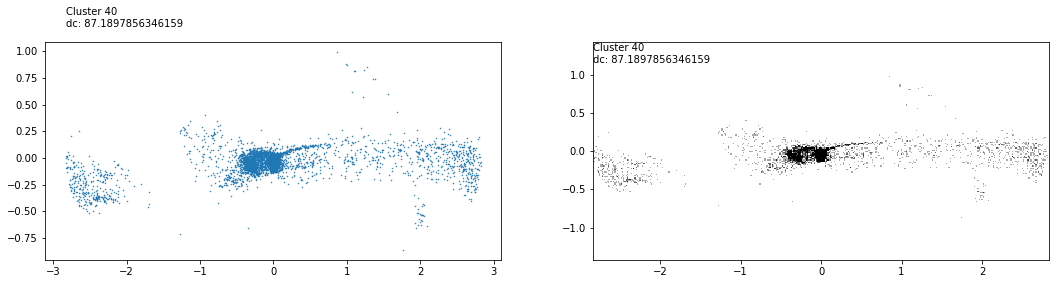

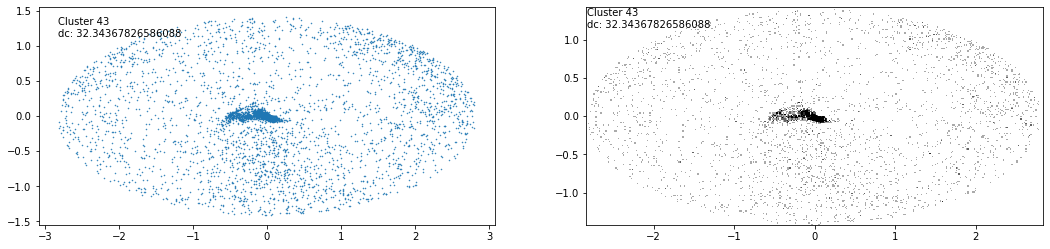

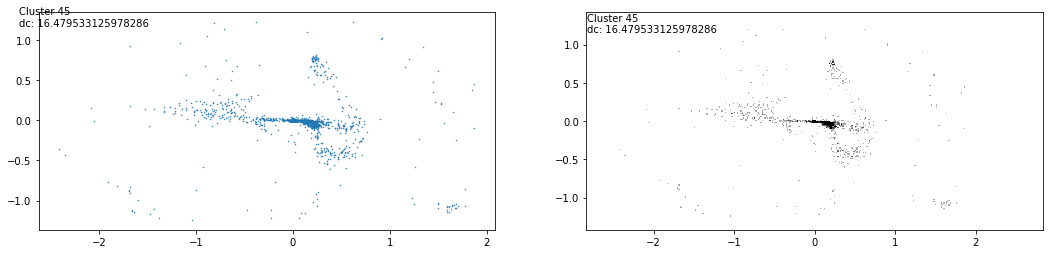

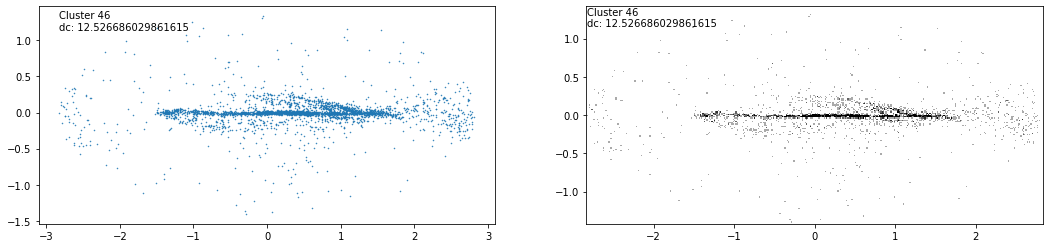

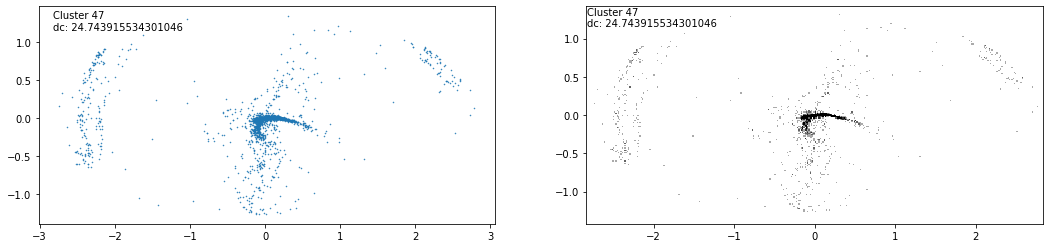

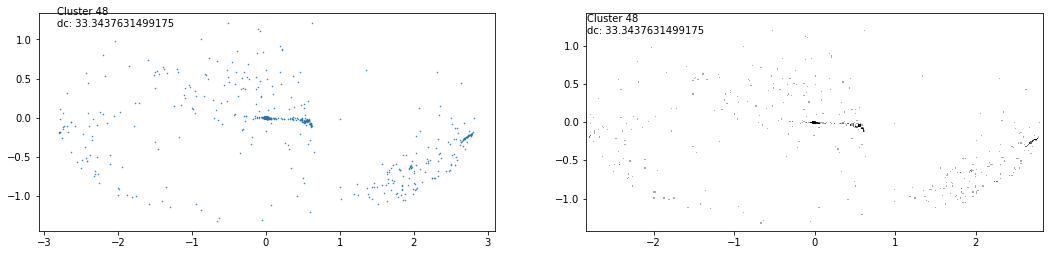

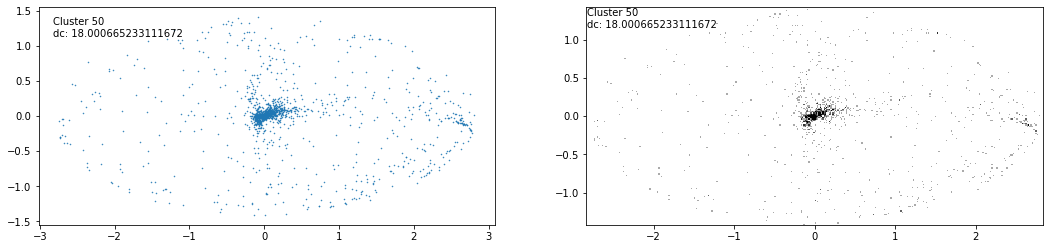

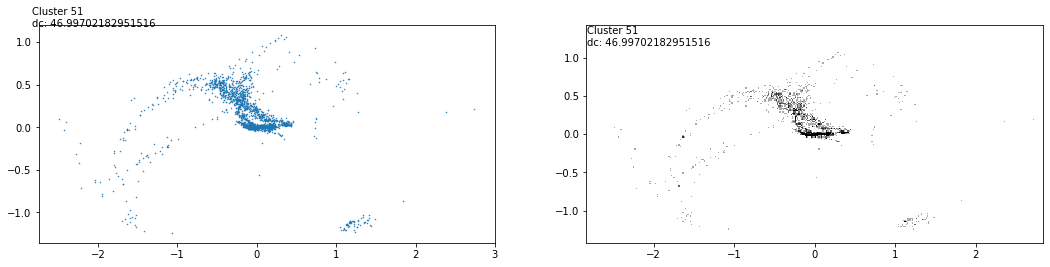

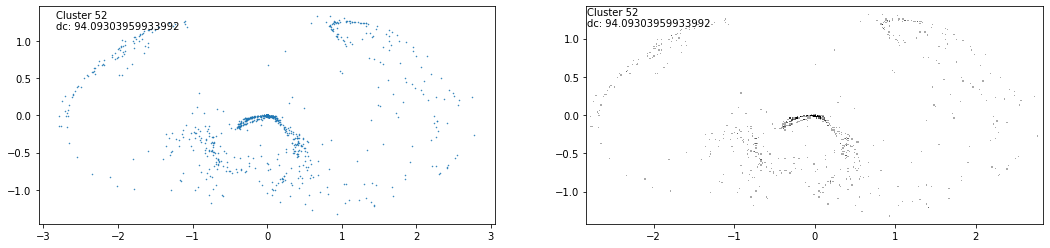

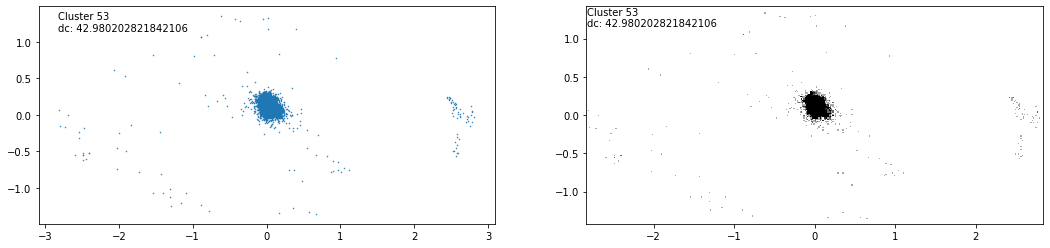

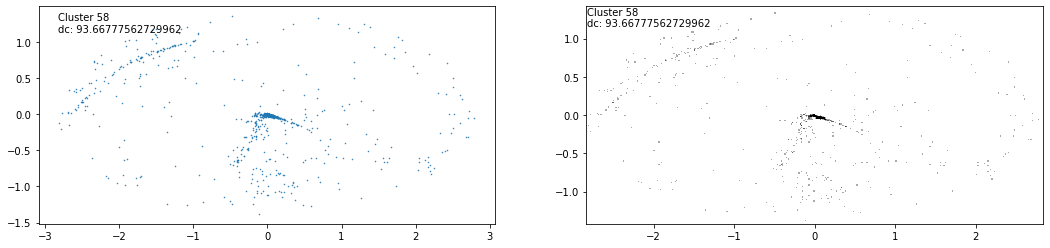

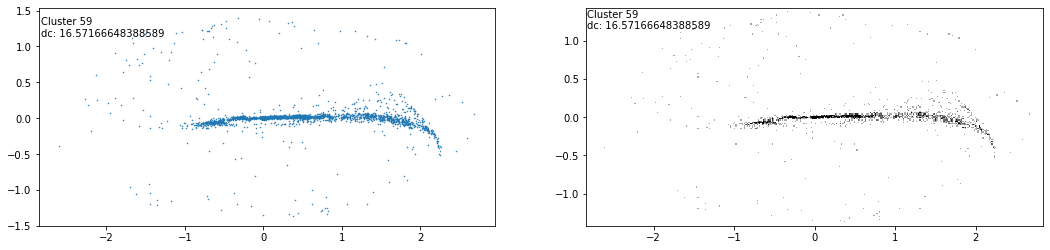

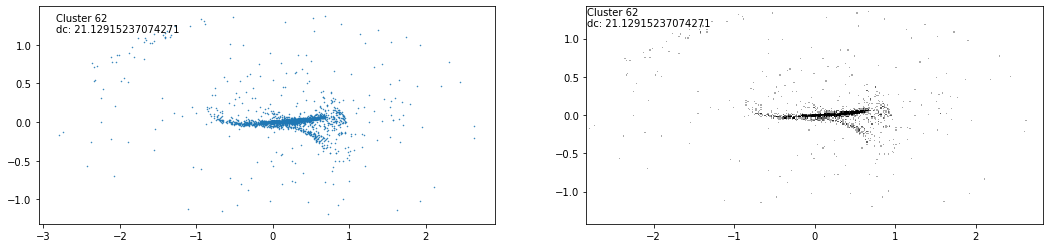

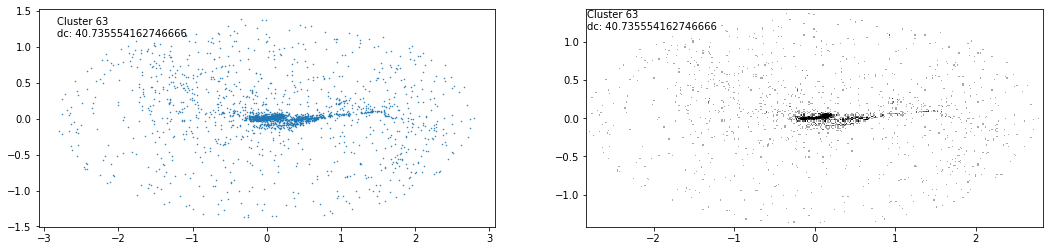

In [15]:
#Hammer (equal area) projection
hd_new = np.sqrt(1.+np.cos(lat_new)*np.cos(lon_new/2))
hx_new = 2.*math.sqrt(2)*np.cos(lat_new)*np.sin(lon_new/2)/hd_new
hy_new = math.sqrt(2)*np.sin(lat_new)/hd_new

plt.rcParams["figure.figsize"] = (18,9)
#fig, (ax1,ax2) = plt.subplots(ncols=2)
#ax1.set_aspect(aspect=1)
ax1.axis([-2.*math.sqrt(2),2.*math.sqrt(2),-math.sqrt(2),math.sqrt(2)])
ax1.set_xlabel('Hammer X',size='x-large')
ax1.set_ylabel('Hammer Y',size='x-large')
#ax1.scatter(hx_new,hy_new,marker='.',s=1) #,color=i)

ax2.set_aspect(aspect=1) 
ax2.set_xlabel('Hammer X',size='x-large') 
ax2.set_ylabel('Hammer Y',size='x-large')

dg = math.sqrt(2)/90 
#grid cell 1 sq deg in hammer units 
#dg /= 4 
#make grid 0.5 deg 
xmax = 2*math.sqrt(2) 
ymax = math.sqrt(2) 
ngx = int(2*xmax/dg +1) 
ngy = int(2*ymax/dg +1) 
x = np.linspace(-xmax, xmax, ngx+1) 
y = np.linspace(-ymax, ymax, ngy+1) 
xv, yv = np.meshgrid(x, y)


D = np.zeros((ngy+1,ngx+1)) 
hx_new_single=[]
hy_new_single=[]

for i in range(nc):
    dplot1 = dc_new[i] > 10
    dplot2 = dc_new[i] < 100
    if dplot1 & dplot2:
        plt.rcParams["figure.figsize"] = (18,4)
        fig, (ax1,ax2) = plt.subplots(ncols=2)
#ax1.set_aspect(aspect=1)
        cplot1 = ics == i
        cplot = cplot1 
        hx_new_single=hx_new[cplot]
        hy_new_single=hy_new[cplot]
        for k in range(len(hx_new_single)):
            # c1= rs[i]>15
            #c2= rs[i]<50
            #c=c1&c2 
            if True : #c : 
                ix = int(round((hx_new_single[k]+xmax)/dg)) 
                iy = int(round((hy_new_single[k]+ymax)/dg)) 
                D[iy ,ix ] += 1.0
        #Ds=D
        Ds = np.sqrt(D) 
        #scaling for plot
        cmap = plt.get_cmap('binary') 
        
        ax1.scatter(hx_new[cplot],hy_new[cplot],marker='.',s=1) #,color=i)
        ax1.text(-1*xmax, ymax, 'Cluster '+str(i)+'\ndc: '+str(dc_new[i]), ha='left', va='top')
        ax2.pcolormesh(xv,yv,Ds,cmap=cmap,vmin=0.5,vmax=2)
        ax2.text(-1*xmax, ymax, 'Cluster '+str(i)+'\ndc: '+str(dc_new[i]), ha='left', va='top')
        D = np.zeros((ngy+1,ngx+1))
#ax1.set_xlabel('Azimuth',size='x-large')
#ax1.set_ylabel('Latitude',size='x-large')
#coslon = lon*np.cos(lat)
#c1=dc_new>10
#c2=dc_new<100

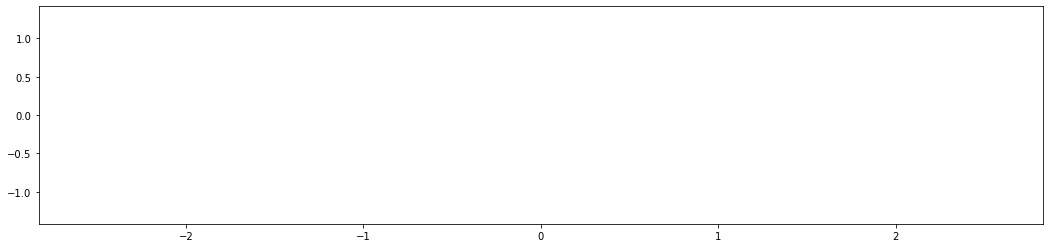

In [11]:
dg = math.sqrt(2)/90 
#grid cell 1 sq deg in hammer units 
dg /= 4 
#make grid 0.5 deg 
xmax = 2*math.sqrt(2) 
ymax = math.sqrt(2) 
ngx = int(2*xmax/dg +1) 
ngy = int(2*ymax/dg +1) 
x = np.linspace(-xmax, xmax, ngx+1) 
y = np.linspace(-ymax, ymax, ngy+1) 
xv, yv = np.meshgrid(x, y)

D = np.zeros((ngy+1,ngx+1)) 
for i in range(len(hx_new)): 
    c1= rs[i]>15 
    c2= rs[i]<50 
    c=c1&c2 
    if c : 
        ix = int(round((hx_new[i]+xmax)/dg)) 
        iy = int(round((hy_new[i]+ymax)/dg)) 
        D[iy ,ix ] += 1.0

Ds = np.sqrt(D) 
#scaling for plot

#plt.rcParams["figure.figsize"] = (18,9)
#ax1= plt.subplots()

#ax1.set_aspect(aspect=1) 
#ax1.set_xlabel('Hammer X',size='x-large') 
#ax1.set_ylabel('Hammer Y',size='x-large')

cmap = plt.get_cmap('binary') 
cr=plt.pcolormesh(xv,yv,Ds,cmap=cmap,vmin=0.5,vmax=4)

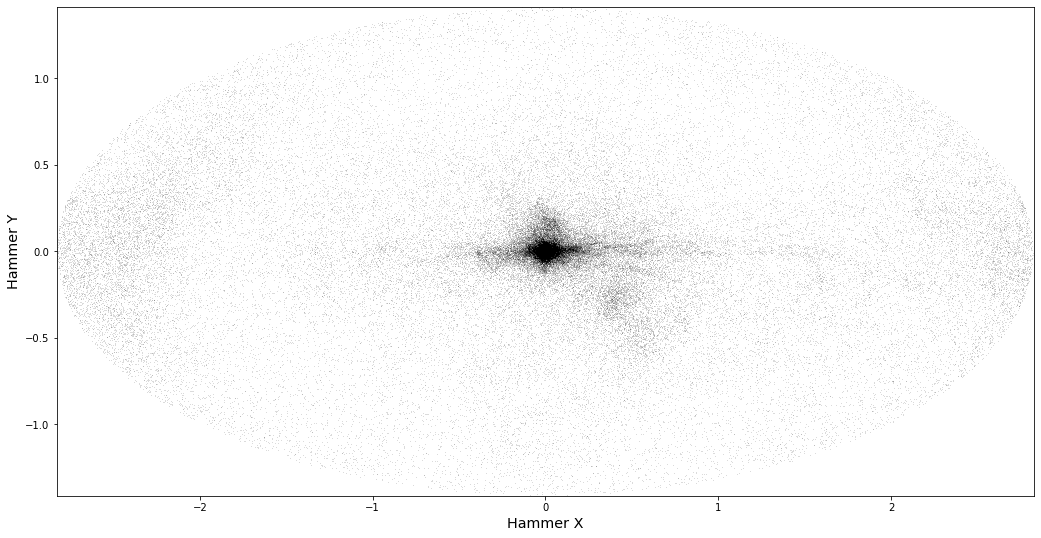

In [12]:
dg = math.sqrt(2)/90 
#grid cell 1 sq deg in hammer units 
dg /= 4 
#make grid 0.5 deg 
xmax = 2*math.sqrt(2) 
ymax = math.sqrt(2) 
ngx = int(2*xmax/dg +1) 
ngy = int(2*ymax/dg +1) 
x = np.linspace(-xmax, xmax, ngx+1) 
y = np.linspace(-ymax, ymax, ngy+1) 
xv, yv = np.meshgrid(x, y)


D = np.zeros((ngy+1,ngx+1)) 
for i in range(len(hx_new)): 
   # c1= rs[i]>15
    #c2= rs[i]<50
    #c=c1&c2 
    if True : #c : 
        ix = int(round((hx_new[i]+xmax)/dg)) 
        iy = int(round((hy_new[i]+ymax)/dg)) 
        D[iy ,ix ] += 1.0
        


Ds = np.sqrt(D) 
#scaling for plot

plt.rcParams["figure.figsize"] = (18,9) 
fig, (ax1) = plt.subplots()

ax1.set_aspect(aspect=1) 
ax1.set_xlabel('Hammer X',size='x-large') 
ax1.set_ylabel('Hammer Y',size='x-large')

cmap = plt.get_cmap('binary') 
ax1.pcolormesh(xv,yv,Ds,cmap=cmap,vmin=0.5,vmax=4)


In [13]:

cmap = plt.get_cmap('binary')
plt.pcolormesh(test,cmap=cmap,vmin=0.5,vmax=4)

NameError: name 'test' is not defined